In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 2

### a) 
We are given the $n$th degree Bezier curve as $c(t)$:


$$
c(t) = b_n(t; p_0, \ldots, p_n) = \sum_{i=1}^n B_{i,n}(t)p_i = \binom{i}{n}t^{i}(1-t)^{n-i}p_i
$$

Using the results from $\textbf{1d)}$ we find the first and second derivative of $c(t)$.

$$
\begin{align*}
c^{\prime}(t) &= \frac{d}{dt} \sum_{i=0}^n B_{i,n}(t)p_i \\
&=\sum_{i=0}^n  \frac{d}{dt} \left(B_{i,n}(t)\right)p_i \\
&= \sum_{i=0}^n n \left(B_{i-1,n-1}(t) - B_{i,n-1}(t) \right) p_i, 
\end{align*}
$$

and for the second order derivative we get

$$
\begin{align*}
c^{\prime \prime}(t) &= \frac{d}{dt} c^{\prime}(t) \\
&=  \frac{d}{dt}  \sum_{i=0}^n n \left(B_{i-1,n-1}(t) - B_{i,n-1}(t) \right) p_i \\
&= n \sum_{i=0}^n \frac{d}{dt} \left(B_{i-1,n-1}(t) - B_{i,n-1}(t) \right) p_i \\
&= n \sum_{i=0}^n (n-1) \left[\left(B_{i-2,n-2}(t) - B_{i-1,n-2}(t)\right) - \left(B_{i-1,n-2}(t) - B_{i,n-2}(t)\right) \right] p_i \\
&= n(n-1)  \sum_{i=0}^n \left(B_{i-2,n-2}(t) - 2B_{i-1,n-2}(t) + B_{i,n-2}(t)\right)p_i. \\
\end{align*}
$$

### b) 
Now we evaluate $c(t)$ at its end points $t= 0$ and $t = 1$. Using the results from $\textbf{1b)}$ we obtain 

$$
c(0) = \sum_{i=0}^n B_{i,n}(0)p_i = (1-0)^np_0 + 0\cdot p_1 + \ldots + 0\cdot p_{n-1}+ 0^n\cdot p_n = p_0 \\
c(1) = \sum_{i=0}^n B_{i,n}(1)p_i = (1-1)^np_0 + 0\cdot p_1 + \ldots + 0\cdot p_{n-1} + 1^n\cdot p_n  = p_n.
$$
 
We observe that for every $n$th degree Bernstein polynomial the $n$th degree Bezier curve evaluated in $t=0$ and $t=1$ is equal to the endpoints $p_0$ and $p_n$. This means that every Bezier curve allways interpolate the first and last point of our sampled points. 


### c)
We are given the following claim 

$$
\textbf{*claim:}
\begin{cases}
c^{\prime}(0) = n(p_0-p_1) \\
c^{\prime}(1) = n(p_n - p_{n-1}) \\
c^{\prime \prime}(0) = n(n-1)(p_0 - 2p_1 +p_{2}) \\
c^{\prime \prime}(1) = n(n-1)(p_n - 2p_{n-1} + p_{n-2}) \\
\end{cases}
$$

To prove that the properties above holds we use our calculated derivatives from $\textbf{2a)}$ and the results from $\textbf{1b)}$ to obtain:

$$
\begin{align*}
c^{\prime}(0) &=  \sum_{i=0}^n n \left(B_{i-1,n-1}(0) - B_{i,n-1}(0) \right)p_i = n(( 0 - (1-0)^n) p_0 + ((1-0)^n -0) p_1 + 0\cdot p_2 + \ldots +0 \cdot p_n) = n(p_1-p_0) \\
c^{\prime}(1) &= \sum_{i=0}^n n \left(B_{i-1,n-1}(1) - B_{i,n-1}(1) \right)p_i = n(0 \cdot p_0 + \cdots + 0 \cdot p_{n-2} + (0 -1^n) p_{n-1} + (1^n - 0)p_n) = n(p_n - p_{n-1}), 
\end{align*}
$$

similarly for the second order derivative we obtain 

$$
\begin{align*}
c^{\prime \prime}(0) &= \sum_{i=0}^n n (n-1) \left(B_{i-2,n-2}(0) - 2B_{i-1,n-2}(0) + B_{i,n-2}(0)\right)p_i = n(n-1)(p_2 - 2p_1 + p_0) \\
c^{\prime \prime}(1) &= \sum_{i=0}^n n (n-1) \left(B_{i-2,n-2}(1) - 2B_{i-1,n-2}(1) + B_{i,n-2}(1)\right)p_i = n(n-1)(p_n - 2p_{n-1} + p_{n-2}), 
\end{align*}
$$

wich proves the claim. 

From the results above we can spesify interpolation properties at it end points. We observe that the first order derivative at $t = 0$ is determined by the order $n$ of the curve as well as the starting point $p_0$ and the following point $p_1$. Similarly for the endpoint $t=1$, the first other derivative is determined on the last two points ($p_{n-1}$ and $p_n$) and the order $n$ of the curve. For the second order derivative (the curvature of the curve), is determined by the first and last three points to respectively $t=0$ and $t=1$, and the order $n$ of the curve. 

If we change $p_1$, we also change both the growth and the curvature of the curve, at the starting point $t=0$. I nice visual idea is to look at the first and second order derivative as respectively velocity and acceleration along the curve. When we increase the distance between the points $p_0$ and $p_1$ we also increase the speed we are traversing the curve, since we are travelling a further distance in the same time interval $\Delta t$. Similarly will the acceleration at $t=0$ be affected by where we place our point $p_1$. This is easily visiable when we look at the formula for the second order derivative at $t=0$.

When we change $p_2$ we change the starting acceleration $\vec{a}(0)$ of the curve, but the starting velocity $\vec{v}(0)$ remains the same. Take the example when we start with points $p_0 = (0,0)$ and $p_1 = (1,1)$ in $\mathbb{R}^2$, and then choose a point $p_2 = (2, 10)$. We observe that the acceleration in the $y$-direction is large, but a small acceleration in $x$-direction. Geometricy wise this means that at the startpoint $t=0$ we need to follow a curve that curves a lot upwards. 


### d) 

$\textbf{*claim:}$ $b_n(t; p_0,\ldots, p_n) = (1 − t)b_{n-1}(t; p_0,\ldots, p_{n−1}) + tb_{n−1}(t; p_1,\ldots, p_n)$

We use the recursive definition of the Berstein polynomials from $\textbf{1b)}$ and obtain:

$$
\begin{align*}
c(t) = b_n(t; p_0,\ldots, p_n) &= \sum_{i=0}^n \left((1-t)B_{i,n-1}(t) + tB_{i-1,n-1}(t)\right) p_i \\
&= \sum_{i=0}^n \left((1-t)B_{i,n-1}(t)p_i\right) + \sum_{i=0}^n \left(tB_{i-1,n-1}(t)p_i\right) \\
&=(1-t) \left(\sum_{i=0}^{n-1} \left(B_{i,n-1}(t)p_i\right) + B_{n,n-1}p_n\right) + t\left( B_{-1,n-1} p_0 + t\sum_{i=0}^{n-1} B_{i,n-1}(t)p_{i+1} \right)\\
&=(1-t) \left(\sum_{i=0}^{n-1} \left(B_{i,n-1}(t)p_i\right) + 0\right) + t\left( 0+ t\sum_{i=0}^{n-1} B_{i,n-1}(t)p_{i+1} \right)\\
&= (1-t)b_{n-1}(t; p_0,\ldots, p_{n−1}) + tb_{n−1}(t; p_1,\ldots, p_n),
\end{align*}
$$

wich proves the claim.


### e) 



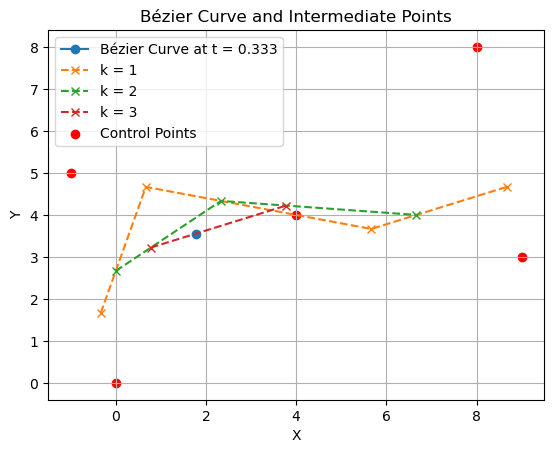

In [8]:
def de_Casteljau(P, t):
    n = len(P) - 1
    Pvecs = [np.array(P)]
    evaluated_points = [P]  # Collect all evaluated points
    for k in range(1, n + 1):
        level = []
        for i in range(n - k + 1):
            p0, p1 = Pvecs[-1][i], Pvecs[-1][i + 1]
            intermediate_point = (1 - t) * p0 + t * p1
            level.append(intermediate_point)
        Pvecs.append(np.array(level))
        evaluated_points.append(level)  # Append the intermediate points

    return evaluated_points, Pvecs

# Define control points as NumPy arrays
p_0 = np.array([0, 0])
p_1 = np.array([-1, 5])
p_2 = np.array([4, 4])
p_3 = np.array([9, 3])
p_4 = np.array([8, 8])
t_0 = 1/3

# Combine control points into a list
control_points = [p_0, p_1, p_2, p_3, p_4]

# Evaluate the curve at t_0
evaluated_points, Pvecs = de_Casteljau(control_points, t_0)

# Prepare data for plotting
x = [point[0] for point in evaluated_points[-1]]  # Use the last level's points
y = [point[1] for point in evaluated_points[-1]]

# Plot the Bézier curve
plt.plot(x, y, marker='o', label=f'Bézier Curve at t = {np.round(t_0,3)}')

# Plot intermediate points for each level
for k in range(1, len(Pvecs)-1):
    x_k = [point[0] for point in Pvecs[k]]
    y_k = [point[1] for point in Pvecs[k]]
    plt.plot(x_k, y_k, linestyle='--', marker='x', label=f'k = {k}')

# Plot control points
control_x = [point[0] for point in control_points]
control_y = [point[1] for point in control_points]
plt.scatter(control_x, control_y, c='red', label='Control Points')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Bézier Curve and Intermediate Points')
plt.legend()
plt.grid(True)
plt.show()


### f) 
For points $(p_0,p_1, \ldots, p_n)\in \mathbb{R}^d$ and $(q_0,q_1, \ldots, q_n)\in \mathbb{R}^d$ with their respective Bézier curves $c(t) = b_n(t; p_0,\ldots, p_n)$ and $d(t) = b_n(t; q_0,\ldots, q_n)$, the composite Bézier curve $s(t)$, $s:[0,2] \rightarrow \mathbb{R}^d$ is defined by: 

$$
s(t) = \begin{cases}
c(t), & 0 \leq t < 1 \\
d(t − 1), & 1\leq t \leq 2.
\end{cases}
$$

1) 
The critical/interesting points to investigate is at all of the end points, when $t=0$, $t=1$ and $t=2$.

2)
For $s(t)$ to be an $C^0$ function it need to be continious in the endpoints. In other words it needs to satisfy

$$
\begin{cases}
s(0) = p_0 \\
\lim_{t\to 1^-} s(t) = p_n = q_0 = s(1) \\
s(2) = q_n
\end{cases}
$$

3)
For $s(t)$ to be an $C^1$ function it need to be continious differentiable. We then have to check if the derivatives of s(t) is continious at the endpoints, as well as s(t) it self. In other words it needs to satisfy

$$
\begin{cases}
s(0) = p_0 \\
s'(0) = n(p_1 -p_0) \\
\lim_{t\to 1^-} s(t) = p_n = q_0 = s(1) \\
\lim_{t\to 1^-} s'(t) = n(p_n - p_{n-1} = n(q_1-q_0) = s'(1) \\
s(2) = q_n \\
s'(2) = n(q_n - q_{n-1})
\end{cases}
$$

4) Which properties have to hold for s(t) to be twice continuously differentiable
(k = 2) ?
Try to simplify the conditions for the third and fourth point based on the properties
you derived before.
5) Let n = 3. How many degrees of freedom do we have left to interpolate data
points d0, d1, d2 ∈ R
d with s(t) (s(h) = dh, h = 0, 1, 2) for s ∈ C
1
? In other
words, how many of the points p0, . . . , p3, q0, . . . , q3 can we still choose freely?
How many are left for s ∈ C
2
?
6) What changes if we want s(t) to be periodic, i.e. s(t) = s(2 + t) for all t for the
continuously differentiability case k = 1?
